In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import datetime,timedelta
from countryinfo import CountryInfo # we can get the information anout country from this (population, coordinates, etc)

import sklearn.metrics as sklm
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

from pylab import rcParams
rcParams['figure.figsize'] = 16, 8


In [2]:
import COVID_load as cload
import COVID_plot as cplot

In [3]:
import COVID_predict_sigmond as cpredict

In [4]:
countries_list = ['India','China','US', 'Italy','Japan','Canada', 'Spain', 'United Kingdom']

In [5]:
cpredict.plot_predict?

Object `cpredict.plot_predict` not found.


In [6]:
print(cload.countries_list())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kaz

In [7]:
ccase = cload.load('Confirmed', countries_list)
dcase = cload.load('Deaths', countries_list)
rcase = cload.load('Recovered', countries_list)

C:\Users\sidha\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


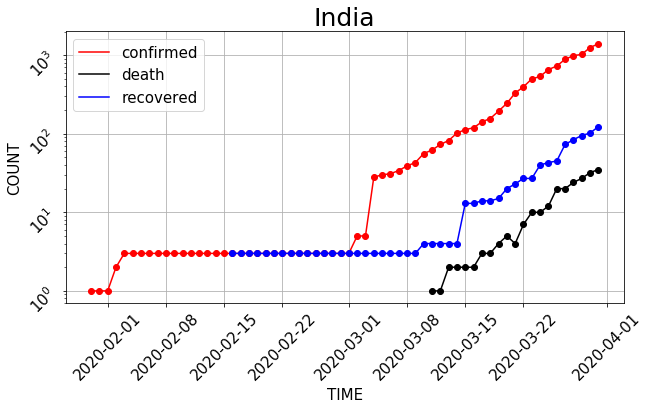

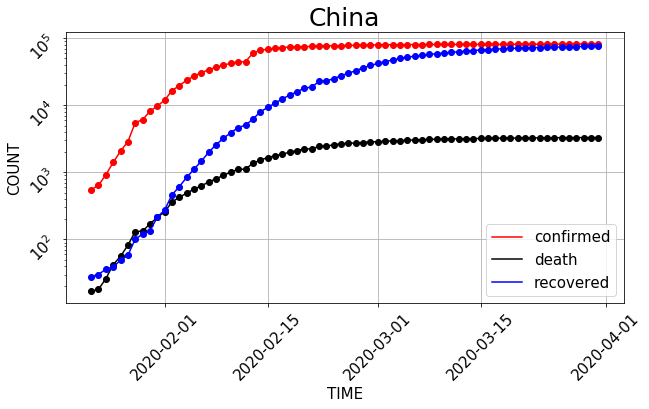

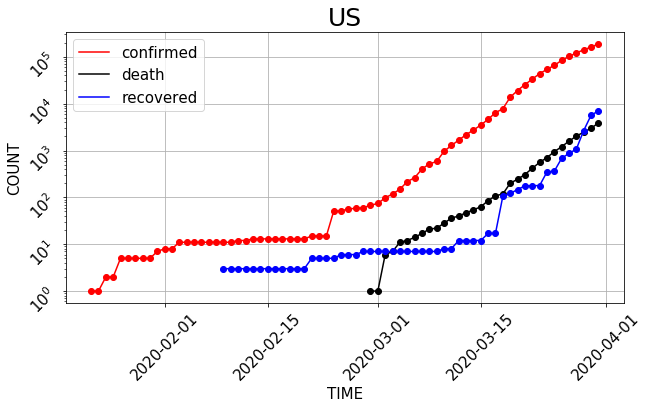

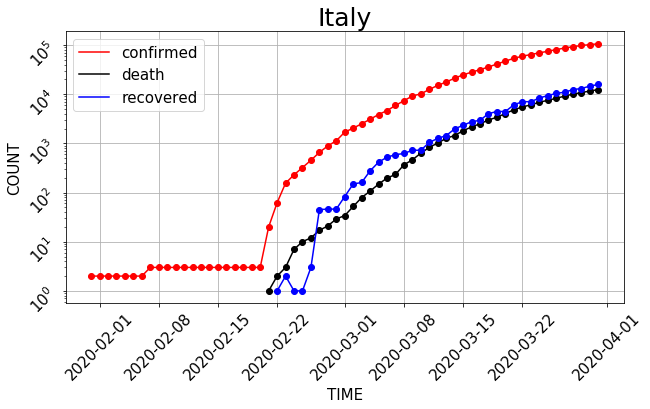

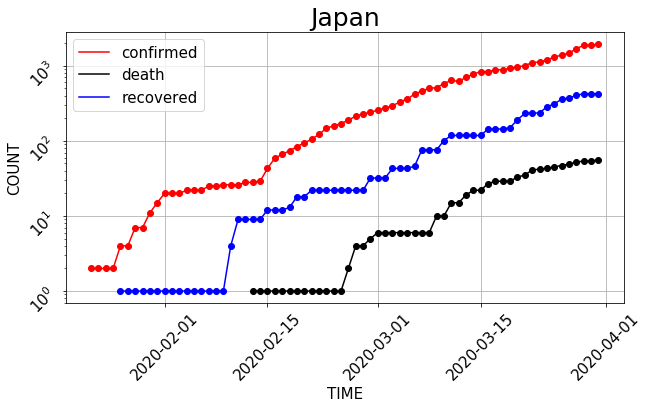

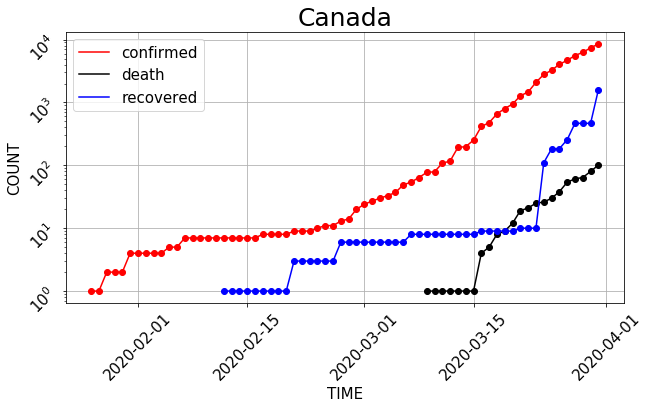

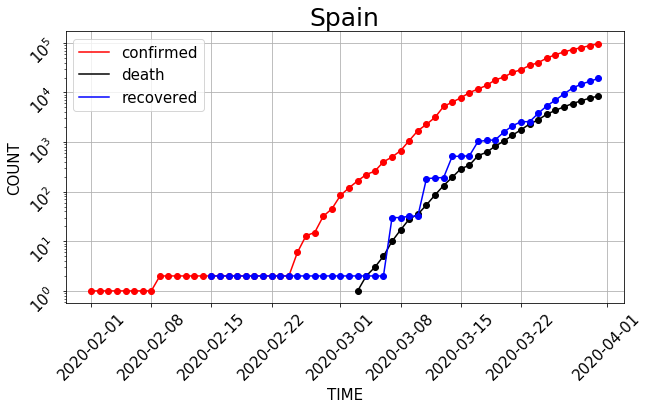

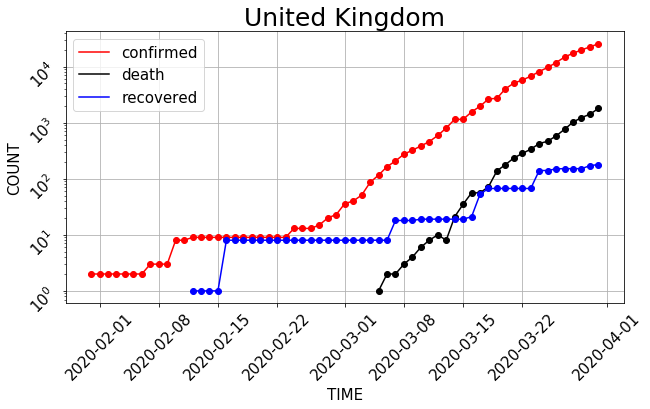

In [8]:
cplot.covid_plot(countries_list, ccase, dcase, rcase)

predicted values


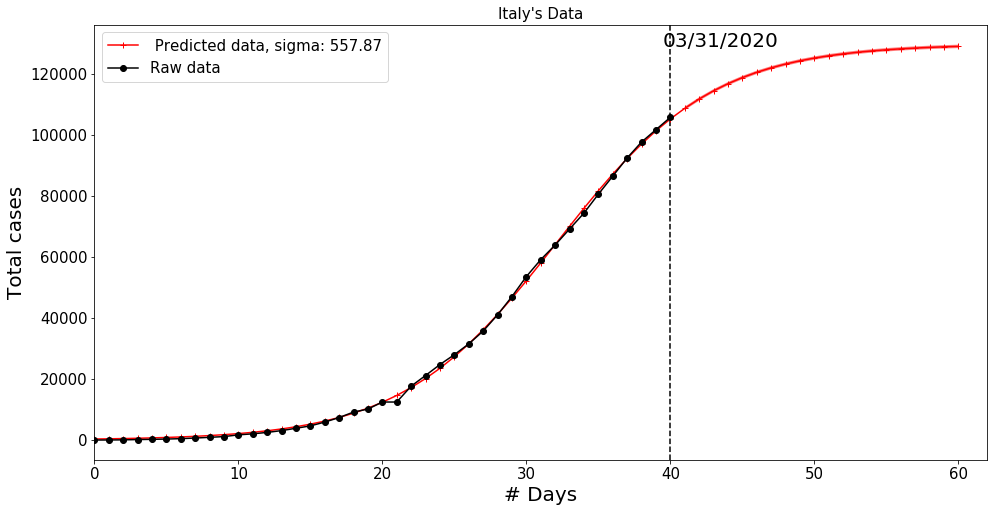

In [16]:
#cpredict.plot_predict(country, stat, future_days, inception, zoom_start)
# prefer inception to be 0 and go till 30ish
cpredict.predict("Italy", "confirm", 20, 0, 0)

In [23]:
data.head(5)

,date,state,country,confirm,death,recover
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [25]:
country_data.head(5)

,date,country,confirm,death,recover
430,01/30/2020,India,1.0,0.0,0.0
491,01/31/2020,India,1.0,0.0,0.0
547,02/01/2020,India,1.0,0.0,0.0
607,02/02/2020,India,2.0,0.0,0.0
672,02/03/2020,India,3.0,0.0,0.0


In [43]:
inception = 1
country_graph = country_data.groupby("date")[['confirm', 'death', 'recover']].sum().reset_index()[inception:]
country_graph.head(5)

,date,confirm,death,recover
1,01/31/2020,1.0,0.0,0.0
2,02/01/2020,1.0,0.0,0.0
3,02/02/2020,2.0,0.0,0.0
4,02/03/2020,3.0,0.0,0.0
5,02/04/2020,3.0,0.0,0.0


In [42]:
country_graph['confirm']


10       3.0
11       3.0
12       3.0
13       3.0
14       3.0
15       3.0
16       3.0
17       3.0
18       3.0
19       3.0
20       3.0
21       3.0
22       3.0
23       3.0
24       3.0
25       3.0
26       3.0
27       3.0
28       3.0
29       3.0
30       3.0
31       3.0
32       5.0
33       5.0
34      28.0
35      30.0
36      31.0
37      34.0
38      39.0
39      43.0
40      56.0
41      62.0
42      73.0
43      82.0
44     102.0
45     113.0
46     119.0
47     142.0
48     156.0
49     194.0
50     244.0
51     330.0
52     396.0
53     499.0
54     536.0
55     657.0
56     727.0
57     887.0
58     987.0
59    1024.0
60    1251.0
61    1397.0
Name: confirm, dtype: float64

[5.61760401e+01 1.99210420e-01 2.80636764e+03]
[[ 6.42500186e-01 -5.04879424e-03  1.95540989e+02]
 [-5.04879424e-03  4.44069635e-05 -1.50582890e+00]
 [ 1.95540989e+02 -1.50582890e+00  5.99938991e+04]]
Predictions:
04/01/2020: 1518
04/02/2020: 1655
04/03/2020: 1787
04/04/2020: 1913
03/31/2020


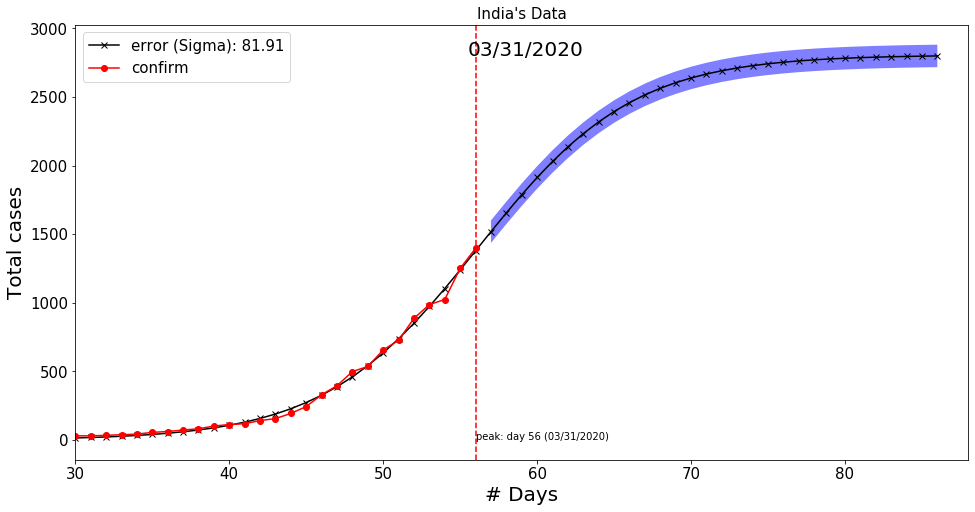

In [12]:
data=pd.read_csv("covid_19_data.csv")
data=data.drop('Last Update', axis=1)
data=data.drop("SNo",axis=1)
data=data.rename(columns={"ObservationDate": "date", "Country/Region": "country", "Province/State": "state","Confirmed":"confirm","Deaths": "death","Recovered":"recover"})

def plot_predict(country, stat, future_days):
    # function to be minimized
    def f_sigmoid(x, a, b, c):
        # a = sigmoid midpoint
        # b = curve steepness (logistic growth)
        # c = max value
        return (c / (1 + np.exp(-b*(x-a))))
  
    inception = 0
    # hardcoding day 0 for several countries based on observations
    if country=="South Korea": inception = 8
    if country=="US": inception = 28
    if country=="Italy": inception = 20
    else: inception = 5
    country_data = data[data["country"]==country].iloc[: , [0, 2, 3 ,4, 5]].copy()
    country_graph = country_data.groupby("date")[['confirm', 'death', 'recover']].sum().reset_index()[inception:]
    y = country_graph[stat]
    #print(len(y), len(country_data), inception)
    x = np.arange(len(y))
    
    # fitting the data on the logistic function
    popt_sig, pcov_sig = curve_fit(f_sigmoid, x, y, method='trf', bounds=([12., 0.001, y.min()],[60., 2.5, 10*y.max()]))
    print(popt_sig)
    print(pcov_sig)
    peakday = datetime.strftime(datetime.strptime(country_graph["date"][inception], "%m/%d/%Y")+timedelta(days=int(popt_sig[0])), "%m/%d/%Y")
    plt.figure(figsize=(16,8))
    
    x_m = np.arange(len(y)+future_days)
    y_m = f_sigmoid(x_m, *popt_sig)
    print("Predictions:")
    for i in range(1,5):
        pday = datetime.strftime(datetime.strptime(country_graph["date"][inception], "%m/%d/%Y")+timedelta(days=len(y)+i-1), "%m/%d/%Y")
        print("%s: %d" % (pday, y_m[len(y)+i-1]))
    #print(country_graph)
    sigma1=((np.round(np.sqrt(np.diag(pcov_sig)).mean(), 2)))
    # creating the matplotlib visualization
    plt.plot(x_m, y_m, c='k', marker="x", label="error (Sigma): "+str(np.round(np.sqrt(np.diag(pcov_sig)).mean(), 2))) 
    plt.fill_between(x_m[-future_days:], y_m[-future_days:]+sigma1, y_m[-future_days:]-sigma1, facecolor='blue', alpha=0.5)
    #plt.text(x_m[-1]+.5, y_m[-1], str(int(y_m[-1])), size = 10)
    
    plt.plot(x, y, c='r', marker="o", label = stat)
    plt.xlabel("# Days", size=20)
    plt.ylabel("Total cases", size = 20)
    plt.legend(prop={'size': 15})
    plt.title(country+"'s Data", size=15)
    plt.axvline(x[-1], linestyle = '--', color = 'r')
    plt.tick_params(labelsize=15)
    plt.text(x[-1]-.5, y_m[-1], str(country_graph["date"][len(y)+inception-1]), size = 20)
    plt.xlim(30, len(y_m)+1)
    print(str(country_graph["date"][len(y)+inception-1]))
    #plt.axvline(int(popt_sig[0]))
    plt.text(int(popt_sig[0]), 1, "peak: day " + str(int(popt_sig[0])) + " (" + peakday + ")", size = 10)
    plt.show()
# See the results for different countries
#plot_predict("Mainland China", "confirm", 10)
#plot_predict("South Korea", "confirm", 10)
plot_predict("India", "confirm", 30)

In [50]:

for i in range(10):
    inception = i
    country_graph = country_data.groupby("date")[['confirm', 'death', 'recover']].sum().reset_index()[inception:]
    print(len(country_graph))

62
61
60
59
58
57
56
55
54
53


In [19]:
def myFun(arg1, *argv): 
    print ("First argument :", arg1) 
    #print(argv[0])
    for arg in argv: 
        print("Next argument through *argv :", arg) 
  
myFun('Hello') 

First argument : Hello
